In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Walmart_Sales.csv")

In [3]:
df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [9]:
# for col in df.columns:
#     print(df[col].value_counts())

In [10]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Store
Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

Column: Date
Date
05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: count, Length: 143, dtype: int64

Column: Weekly_Sales
Weekly_Sales
1643690.90    1
446751.45     1
1332261.01    1
1366193.35    1
1384870.51    1
             ..
551799.63     1
573498.64     1
553901.97     1
533161.64     1
760281.43     1
Name: count, Length: 6435, dtype: int64

Column

In [13]:
df = df.drop('Date',axis = 1)

In [14]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [52]:
x = df[['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
y = np.array(df['Weekly_Sales'])

In [53]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,42.31,2.572,211.096358,8.106
1,1,1,38.51,2.548,211.242170,8.106
2,1,0,39.93,2.514,211.289143,8.106
3,1,0,46.63,2.561,211.319643,8.106
4,1,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684
6431,45,0,64.89,3.985,192.170412,8.667
6432,45,0,54.47,4.000,192.327265,8.667
6433,45,0,56.47,3.969,192.330854,8.667


In [54]:
y

array([1643690.9 , 1641957.44, 1611968.17, ...,  734464.36,  718125.53,
        760281.43])

In [55]:
print(x.shape,y.shape)

(6435, 6) (6435,)


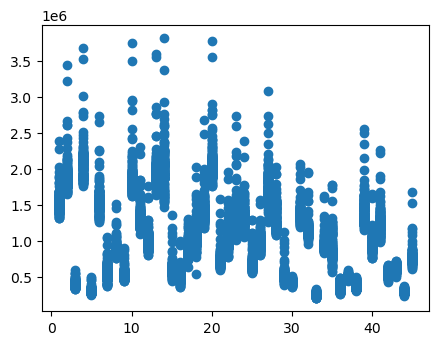

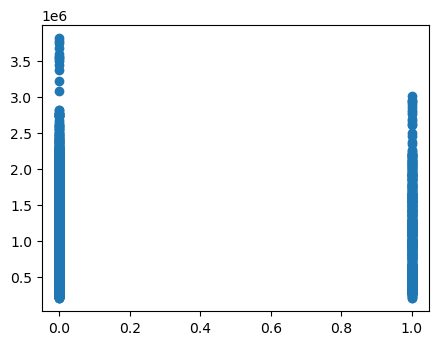

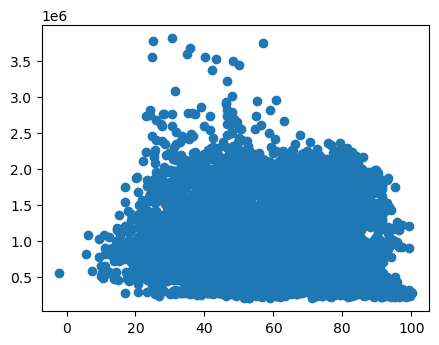

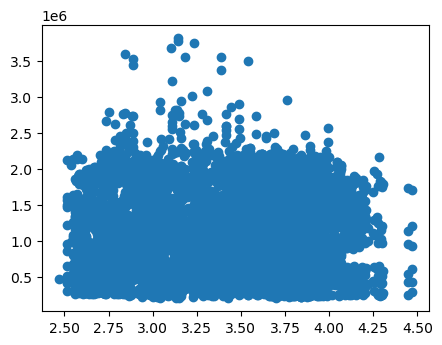

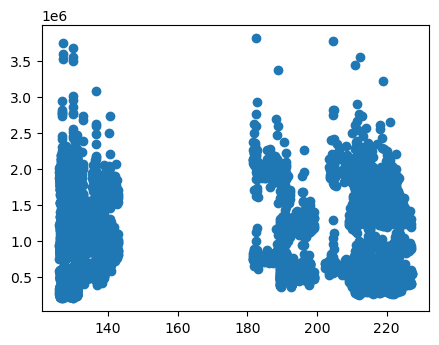

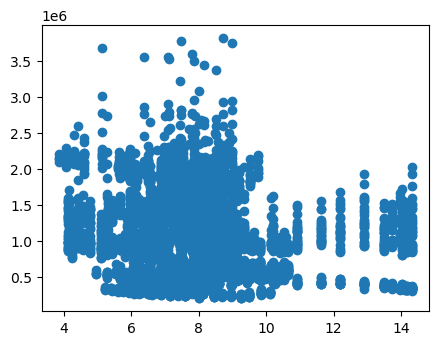

In [56]:
i = 1
for col in x.columns:
    plt.figure(figsize=(5,35))
    plt.subplot(8,1,i)
    i+=1
    plt.scatter(x[col],y)
    plt.show()

In [57]:
corr = x.corr() 

In [58]:
corr

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Holiday_Flag,-4.386841e-16,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

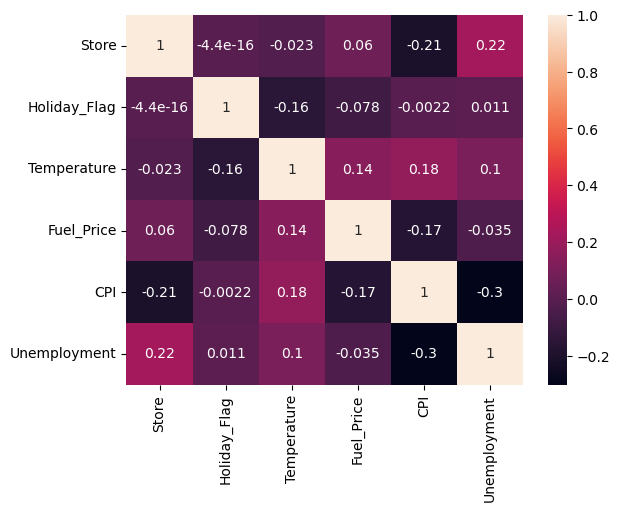

In [59]:
sns.heatmap(corr,annot = True)

In [60]:
print(x.shape,y.shape)

(6435, 6) (6435,)


In [120]:
x_train = x[:5000]
x_test = x[5000:]
y_train = y[:5000]
y_test = y[5000:]

In [121]:
x_train = np.insert(x_train,0,1,axis =1)

In [122]:
x_train.shape

(5000, 7)

In [123]:
def model_fit(x_train,y_train):
    beta = 0
    beta = np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
    return beta[0],beta[1:]

In [124]:
bias,coef = model_fit(x_train,y_train)

In [125]:
bias

2125557.3855874296

In [126]:
coef

array([-1.53663424e+04,  9.90808997e+04,  6.41813010e+01,  8.41998251e+03,
       -3.66613728e+03, -1.55672963e+04])

In [127]:
coef.shape

(6,)

In [128]:
def prediction(x_test):
    y_pred = np.dot(x_test , coef) + bias
    return y_pred

In [129]:
y_pred = prediction(x_test)

In [130]:
y_test[0],y_pred[0]

(814099.86, 964558.5512056809)

In [131]:
from sklearn.metrics import r2_score

In [132]:
score = r2_score(y_test,y_pred)

In [134]:
score

-0.3271291240830687